In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [5]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

#need info for: city, Temp, cloudiness, humidity, windspeed, lat, long
# City        -- weather_json['name'] 
# Cloudiness  -- weather_json['clouds']['all']  
# Country     -- weather_json['sys']['country']   
# Date        -- weather_json['dt']
# Humidity    -- weather_json['main']['humidity']
# Lat         -- weather_json['coord']['lat']
# Lng         -- weather_json['coord']['lon']  
# Max Temp    -- weather_json['main']['temp_max']    
# Wind Speed  -- weather_json['wind']['speed']  

In [6]:
#lists to hold weather data
city_name = []
cloudines = []
country =[]
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
not_found = []
loop=1

units='imperial'
base_url= 'http://api.openweathermap.org/data/2.5/weather?'

In [7]:
# Iterate through list of cities previously generated
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name)
print('Beginning Data Retrieval')    
print('-----------------------------')

for x in cities:
#     Query each city within list 
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    weather_response = requests.get(query_url + x)
    weather_json=weather_response.json()
    
#     Use exceptions to account for cities not found in API
    try:
#       Request information from API needed for assignment for each city
        city_name.append(weather_json['name'])
        cloudines.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        print(f'Processing Record {loop} | {x}')
#     KeyError occurs when city not found (no reponse to query into)
    except KeyError:
        not_found.append(x)
        print(f'City ({x}) not found. Skipping...')
        loop=loop-1
    loop+=1
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | cidreira
Processing Record 2 | rikitea
Processing Record 3 | fortuna
City (vaitupu) not found. Skipping...
Processing Record 4 | sao felix do xingu
Processing Record 5 | chokurdakh
Processing Record 6 | albany
Processing Record 7 | christchurch
Processing Record 8 | busselton
Processing Record 9 | tokur
Processing Record 10 | punta arenas
Processing Record 11 | ushtobe
Processing Record 12 | longyearbyen
City (taolanaro) not found. Skipping...
Processing Record 13 | carnarvon
Processing Record 14 | mayumba
Processing Record 15 | tuktoyaktuk
Processing Record 16 | karratha
Processing Record 17 | umm lajj
City (barbar) not found. Skipping...
Processing Record 18 | korla
Processing Record 19 | vila velha
Processing Record 20 | ribeira grande
Processing Record 21 | hobart
Processing Record 22 | cabo san lucas
Processing Record 23 | hilo
Processing Record 24 | constitucion
Processing Record 25 | torbay
Processing R

Processing Record 225 | palasa
Processing Record 226 | kysyl-syr
Processing Record 227 | sergeyevka
Processing Record 228 | hualmay
Processing Record 229 | nome
Processing Record 230 | twentynine palms
City (nam tha) not found. Skipping...
Processing Record 231 | novikovo
Processing Record 232 | sorong
Processing Record 233 | codrington
Processing Record 234 | dongying
Processing Record 235 | kinkala
Processing Record 236 | riyadh
Processing Record 237 | callaway
Processing Record 238 | port elizabeth
Processing Record 239 | sumenep
Processing Record 240 | hami
Processing Record 241 | half moon bay
Processing Record 242 | muscat
City (warqla) not found. Skipping...
Processing Record 243 | phu ly
Processing Record 244 | puerto princesa
Processing Record 245 | ravar
Processing Record 246 | gamba
Processing Record 247 | atar
Processing Record 248 | buraydah
City (tabialan) not found. Skipping...
Processing Record 249 | seminole
City (huazolotitlan) not found. Skipping...
Processing Record

Processing Record 444 | minas
Processing Record 445 | sindang
Processing Record 446 | abadan
Processing Record 447 | pierre
Processing Record 448 | pathein
Processing Record 449 | gonbad-e qabus
Processing Record 450 | darnah
Processing Record 451 | gasa
Processing Record 452 | new iberia
Processing Record 453 | alappuzha
Processing Record 454 | katherine
Processing Record 455 | akyab
Processing Record 456 | panzhihua
Processing Record 457 | wahiawa
City (nizhneyansk) not found. Skipping...
Processing Record 458 | touros
City (kalabugao) not found. Skipping...
Processing Record 459 | bouna
Processing Record 460 | bandar-e anzali
Processing Record 461 | nanjing
Processing Record 462 | sabang
Processing Record 463 | nurota
Processing Record 464 | santa cruz del norte
Processing Record 465 | san isidro
Processing Record 466 | iskateley
Processing Record 467 | nizhneangarsk
Processing Record 468 | sarakhs
Processing Record 469 | korem
Processing Record 470 | takoradi
Processing Record 471 

In [8]:
# Some cities not found
print(f'{len(not_found)}/{len(cities)} cities were not found')

# Create new list excluding the missing information
not_found=set(not_found)
cities=set(cities)
updated_cities = list(cities-not_found)

#should it be run again?

57/616 cities were not found


In [9]:
dates=[]
for city in date:
    date_test=city
    date_conversion=time.gmtime(date_test)
    date_format=time.strftime('%m/%d/%Y',date_conversion )
    dates.append(date_format)

In [10]:
# Export the city data into a .csv.
# before making data frame shojld each list be put into csv?

In [11]:
# Create data frame with lists for each city
weather_df=pd.DataFrame({"City": city_name,
                        'Cloudiness': cloudines,
                        'Country': country,
                        'Date': date,
                        'Humidity (%)': humidity,
                        'Latitude': lat,
                        'Longitude': lon,
                        'Max Temperature': max_temp,
                        'Wind Speed (MPH)': wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity (%),Latitude,Longitude,Max Temperature,Wind Speed (MPH)
0,Cidreira,63,BR,1583872755,87,-30.18,-50.21,76.03,10.69
1,Rikitea,27,PF,1583872755,81,-23.12,-134.97,78.73,14.81
2,Fortuna,20,US,1583872755,71,40.60,-124.16,66.99,11.41
3,São Félix do Xingu,100,BR,1583872756,88,-6.64,-51.99,78.91,2.42
4,Chokurdakh,14,RU,1583872756,84,70.63,147.92,-31.25,4.50


In [ ]:
#SAVE CSV

In [12]:
# PLOTTING

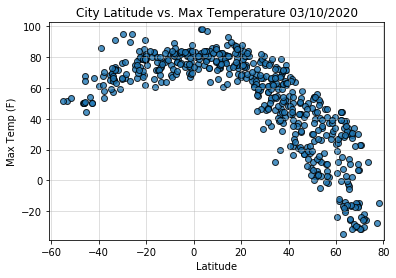

In [27]:
# Latitude vs. Temperature Plot
x_latitude = weather_df.loc[:,'Latitude']
y_temp = weather_df.loc[:,'Max Temperature']
plt.scatter(x_latitude,y_temp, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_temp)-4,max(y_temp)+4)

plt.savefig("../output_data/lat_temp.png")

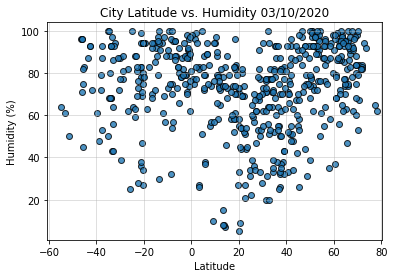

In [28]:
# Latitude vs. Humidity Plot
y_humidity = weather_df.loc[:,'Humidity (%)']
plt.scatter(x_latitude,y_humidity, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_humidity)-4,max(y_humidity)+4)

plt.savefig("../output_data/lat_humidity.png")

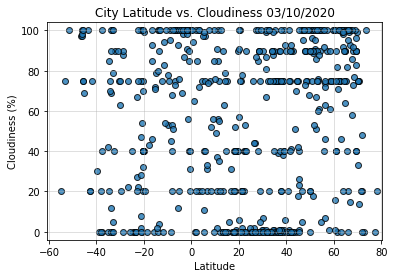

In [29]:
# Latitude vs. Cloudiness Plot
y_cloudiness = weather_df.loc[:,'Cloudiness']
plt.scatter(x_latitude,y_cloudiness, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-6,max(x_latitude)+2)
plt.ylim(min(y_cloudiness)-4,max(y_cloudiness)+4)

plt.savefig("../output_data/lat_cloud.png")

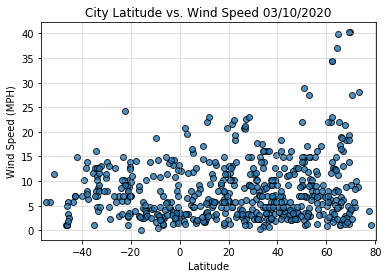

In [30]:
# Latitude vs. Wind Speed Plot
y_wind = weather_df.loc[:,'Wind Speed (MPH)']
plt.scatter(x_latitude,y_wind, edgecolor='black', alpha=.8)
plt.title(f"City Latitude vs. Wind Speed {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(alpha=.5)
plt.xlim(min(x_latitude)-2,max(x_latitude)+2)
plt.ylim(min(y_wind)-2,max(y_wind)+2)

plt.savefig("../output_data/lat_wind.png")

In [37]:
# Create Northern and Southern Hemisphere DataFrames 
# Northern: Lat 0 - 90
# Southern: Lat 0 - (-90)
northern_df= weather_df.loc[weather_df['Latitude']>=0]
southern_df= weather_df.loc[weather_df['Latitude']<0]

#These will be the x,y axis for plots needed
n_latitude = northern_df.loc[:,'Latitude']
s_latitude = southern_df.loc[:,'Latitude']
n_temp = northern_df.loc[:,'Max Temperature']
s_temp = southern_df.loc[:,'Max Temperature']
n_humidity = northern_df.loc[:,'Humidity (%)']
s_humidity = southern_df.loc[:,'Humidity (%)']
n_cloudiness = northern_df.loc[:,'Cloudiness']
s_cloudiness = southern_df.loc[:,'Cloudiness']
n_wind = northern_df.loc[:,'Wind Speed (MPH)']
s_wind = southern_df.loc[:,'Wind Speed (MPH)']

In [18]:
#Create function to plot each graph with line of best fit:
def plot_graph(x,y):
    plt.scatter(x,y)
    plt.xlim(min(x)-3,max(x)+2)
    plt.ylim(min(y)-4,max(y)+4)
    #Correlation
    _slope, _int, _r, _p, _std_err = st.linregress(x, y)
    best_fit = _slope * x + _int
    plt.plot(x,best_fit,"r-", linewidth=.5)
    line_eq = "y = " + str(round(_slope,2)) + "x + " + str(round(_int,2))
    plt.annotate(line_eq,(min(x)+10,min(y)+20),fontsize=12,color="red")
    #pearon correlation statement
    pearson_r=st.pearsonr(x,y)[0]
    if abs(pearson_r)>0.7:
        print(f'The r value is {round(pearson_r,2)}, there is strong correlation between the city latitude and weather')
    elif abs(pearson_r)>0.5:
        print(f'The r value is {round(pearson_r,2)}, there is a moderate correlation between the city latitude and weather')
    elif abs(pearson_r)>0.3:
        print(f'The r value is {round(pearson_r,2)}, there is a weak correlation between the city latitude and weather')
    else:
        print(f'The r value is {round(pearson_r,2)}, there is no correlation between the city latitude and weather')
        

The r value is -0.86, there is strong correlation between the city latitude and weather


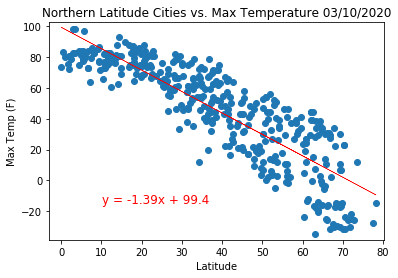

In [31]:
# NORTHERN Latitude vs. Temperature Plot
plot_graph(n_latitude,n_temp)

#format
plt.title(f"Northern Latitude Cities vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../output_data/north_temp.png")

The r value is 0.64, there is a moderate correlation between the city latitude and weather


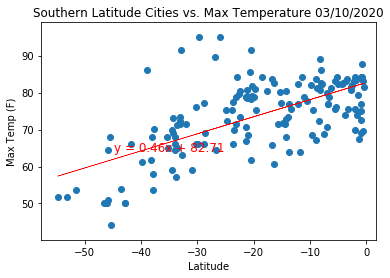

In [32]:
# SOUTHERN Latitude vs. Temperature Plot
plot_graph(s_latitude,s_temp)

plt.title(f"Southern Latitude Cities vs. Max Temperature {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../output_data/south_temp.png")

The r value is 0.31, there is a weak correlation between the city latitude and weather


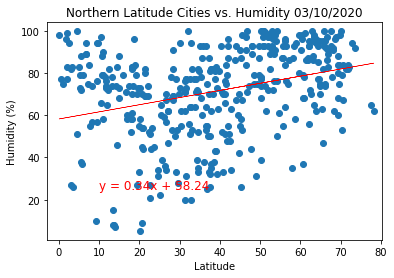

In [33]:
# NORTHERN Latitude vs. Humidity Plot
plot_graph(n_latitude,n_humidity)

plt.title(f"Northern Latitude Cities vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../output_data/north_humidity.png")

The r value is 0.17, there is no correlation between the city latitude and weather


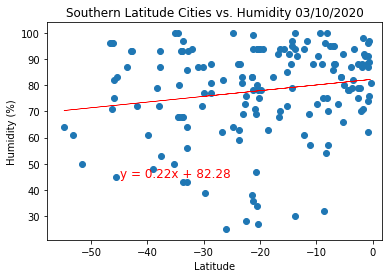

In [34]:
# SOUTHERN Latitude vs. Humidity Plot
plot_graph(s_latitude,s_humidity)
plt.title(f"Southern Latitude Cities vs. Humidity {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../output_data/south_humidity.png")

The r value is 0.27, there is no correlation between the city latitude and weather


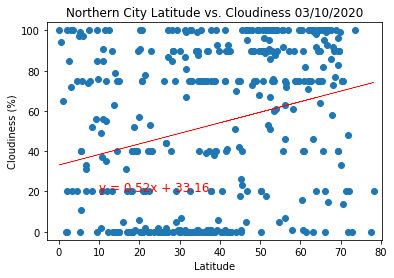

In [35]:
# NORTHERN Latitude vs. Cloudiness Plot
plot_graph(n_latitude,n_cloudiness)
plt.title(f"Northern City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/north_cloud.png")

The r value is 0.21, there is no correlation between the city latitude and weather


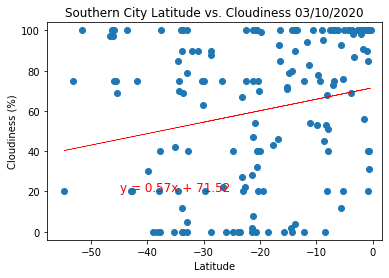

In [36]:
# SOUTHERN Latitude vs. Cloudiness Plot
plot_graph(s_latitude,s_cloudiness)
plt.title(f"Southern City Latitude vs. Cloudiness {dates[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/south_cloud.png")

The r value is 0.13, there is no correlation between the city latitude and weather


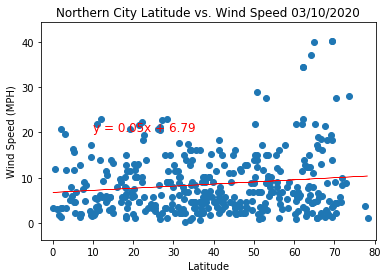

In [38]:
# NORTHERN Latitude vs. Wind Speed Plot
plot_graph(n_latitude,n_wind)
plt.title(f"Northern City Latitude vs. Wind Speed {dates[0]}")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (MPH)")

plt.savefig("../output_data/north_wind.png")

The r value is -0.15, there is no correlation between the city latitude and weather


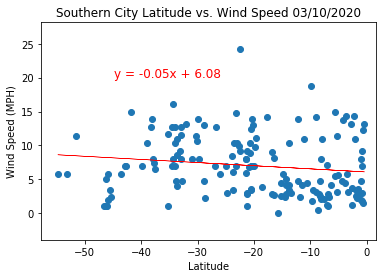

In [39]:
# SOUTHER Latitude vs. Wind Speed Plot
plot_graph(s_latitude,s_wind)
plt.title(f"Southern City Latitude vs. Wind Speed {dates[0]}")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (MPH)")

plt.savefig("../output_data/south_wind.png")